In [1]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# ==========Load Dataset ==========
data_path = "../Data/crop_recommendation.csv"
df = pd.read_csv(data_path)

In [3]:
print("✅ Dataset Loaded. Shape:", df.shape)
print("📊 Features:", list(df.columns))

✅ Dataset Loaded. Shape: (2200, 23)
📊 Features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'soil_moisture', 'soil_type', 'sunlight_exposure', 'wind_speed', 'co2_concentration', 'organic_matter', 'irrigation_frequency', 'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage', 'urban_area_proximity', 'water_source_type', 'frost_risk', 'water_usage_efficiency']


In [10]:
# ========== Step 2: Features and Target ==========
X = df.drop(columns=["label"])
y = df["label"]

# ========== Step 3: Train/Test Split ==========
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data Split: Train =", X_train.shape, "| Test =", X_test.shape)

✅ Data Split: Train = (1760, 22) | Test = (440, 22)


In [11]:
# ========== Step 4: Initialize Models ==========
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500)
}

In [13]:
best_model = None
best_score = 0
results = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results += f"\n{name} Accuracy: {acc:.4f}\n"
    results += classification_report(y_test, y_pred)
    
    print(f" {name} trained. Accuracy: {acc:.4f}")
    
    if acc > best_score:
        best_score = acc
        best_model = model

 RandomForest trained. Accuracy: 0.9886
 LogisticRegression trained. Accuracy: 0.9295


C:\Users\Shebon\anaconda3\envs\Data_Science_NLP\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# ========== Step 6: Save Best Model ==========
os.makedirs("../ml_model", exist_ok=True)
model_path = "../ml_model/crop_model.pkl"
joblib.dump(best_model, model_path)
print(f"💾 Best model saved as {model_path}")

💾 Best model saved as ../ml_model/crop_model.pkl


📊 Confusion matrix saved as confusion_matrix.png
📄 Classification report saved to model_report.txt


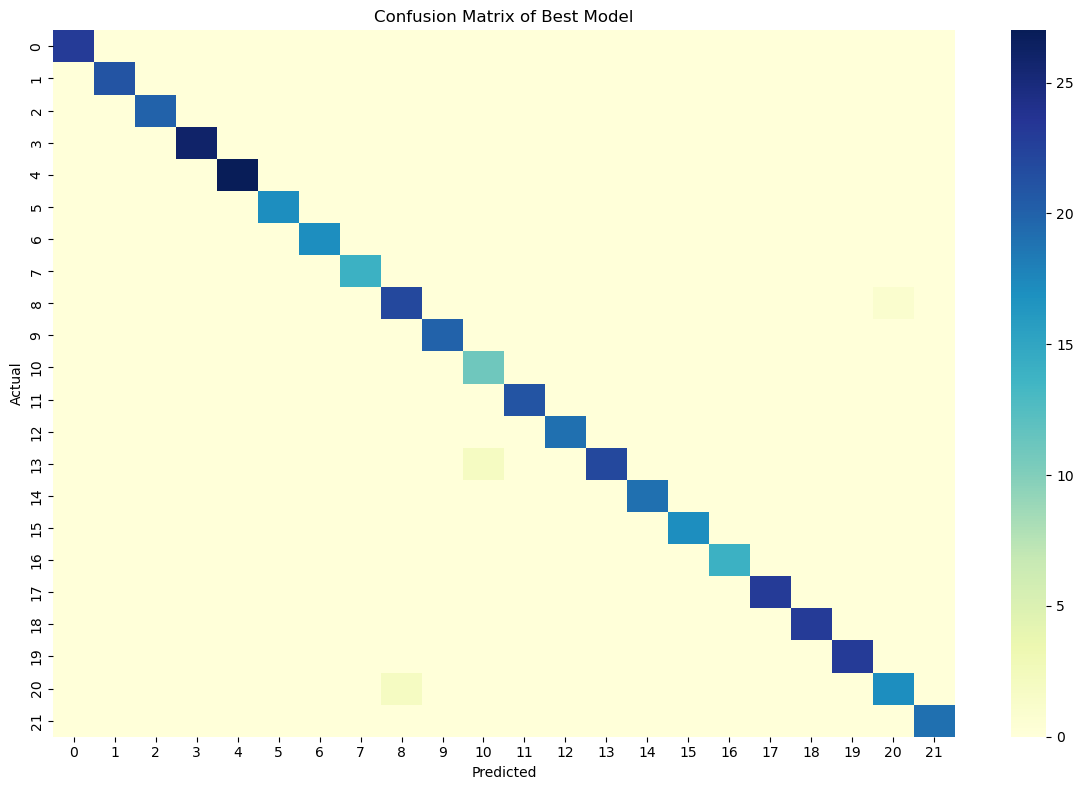

In [19]:
# ========== Step 7: Confusion Matrix ==========
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="YlGnBu")
plt.title("Confusion Matrix of Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../ml_model/confusion_matrix.png")
print("📊 Confusion matrix saved as confusion_matrix.png")

# ========== Step 8: Save Evaluation Report ==========
with open("../ml_model/model_report.txt", "w") as f:
    f.write(results)

print("📄 Classification report saved to model_report.txt")